In [139]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv('hotel_data.csv',encoding='latin-1')
#df=pd.read_csv('hotel_data.csv',encoding='latin-1')
#hotel_info=data[['hotel','address']].copy(deep=True)
df=data.copy(deep=True)
data

,ï»¿Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax,state
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,NaN,NaN,"7,567","2,254",bangalore
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,NaN,NaN,"1,509",531,bangalore
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.4 km,"9,900",NaN,bangalore
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,770 m,"2,347",918,bangalore
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,NaN,NaN,"2,522","1,014",bangalore
...,...,...,...,...,...,...,...,...,...,...,...
575,Blossom Dormitory ( For Male and Female),3.6,Very Good,214.0,NaN,Sakinaka,T2 - Chhatrapati Shivaji International Airport,3.4 km,678,189,mumbai
576,Comfort Inn Heritage,3.9,Very Good,963.0,4.0,South Mumbai,NaN,NaN,"4,743","1,122",mumbai
577,Hotel Planet Residency,3.8,Very Good,1064.0,3.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,2.2 km,"3,726","1,028",mumbai
578,Hotel Kohinoor Elite,4.1,Very Good,2183.0,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,6.1 km,"7,250",NaN,mumbai


DATA CLEANING AND PREPROCESSING

In [141]:
data.columns

Index(['ï»¿Hotel Name', 'Rating', 'Rating Description', 'Reviews',
       'Star Rating', 'Location', 'Nearest Landmark', 'Distance to Landmark',
       'Price', 'Tax', 'state'],
      dtype='object')

In [142]:
data.rename(columns={"ï»¿Hotel Name":"Name","Rating Description":"RD","Nearest Landmark":"NL","Distance to Landmark":"DL" },inplace=True)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         580 non-null    object 
 1   Rating       579 non-null    float64
 2   RD           579 non-null    object 
 3   Reviews      579 non-null    float64
 4   Star Rating  485 non-null    float64
 5   Location     580 non-null    object 
 6   NL           290 non-null    object 
 7   DL           290 non-null    object 
 8   Price        580 non-null    object 
 9   Tax          404 non-null    object 
 10  state        580 non-null    object 
dtypes: float64(3), object(8)
memory usage: 50.0+ KB


In [144]:

data['Price']=pd.to_numeric(data['Price'].str.replace(',','',regex=True).str.strip())
data['Tax']=pd.to_numeric(data['Tax'].str.replace(',','',regex=True).str.strip())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         580 non-null    object 
 1   Rating       579 non-null    float64
 2   RD           579 non-null    object 
 3   Reviews      579 non-null    float64
 4   Star Rating  485 non-null    float64
 5   Location     580 non-null    object 
 6   NL           290 non-null    object 
 7   DL           290 non-null    object 
 8   Price        580 non-null    int64  
 9   Tax          404 non-null    float64
 10  state        580 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 50.0+ KB


In [145]:
for col in data.columns :
  if data[col].dtype=='object':
    data[col]=encoder.fit_transform(data[col])
data.drop(['Location','NL','DL'], axis=1, inplace=True)
data=data.fillna(0)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         580 non-null    int64  
 1   Rating       580 non-null    float64
 2   RD           580 non-null    int64  
 3   Reviews      580 non-null    float64
 4   Star Rating  580 non-null    float64
 5   Price        580 non-null    int64  
 6   Tax          580 non-null    float64
 7   state        580 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 36.4 KB


In [146]:
data

,Name,Rating,RD,Reviews,Star Rating,Price,Tax,state
0,509,3.9,4,4187.0,5.0,7567,2254.0,1
1,268,4.0,4,2201.0,4.0,1509,531.0,1
2,237,4.4,1,1315.0,5.0,9900,0.0,1
3,290,4.0,4,5089.0,5.0,2347,918.0,1
4,265,4.0,4,3290.0,4.0,2522,1014.0,1
...,...,...,...,...,...,...,...,...
575,34,3.6,4,214.0,0.0,678,189.0,5
576,50,3.9,4,963.0,4.0,4743,1122.0,5
577,194,3.8,4,1064.0,3.0,3726,1028.0,5
578,182,4.1,4,2183.0,4.0,7250,0.0,5


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.3'),
  Text(3, 0, '2.5'),
  Text(4, 0, '2.7'),
  Text(5, 0, '2.8'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.1'),
  Text(8, 0, '3.2'),
  Text(9, 0, '3.3'),
  Text(10, 0, '3.4'),
  Text(11, 0, '3.5'),
  Text(12, 0, '3.6'),
  Text(13, 0, '3.7'),
  Text(14, 0, '3.8'),
  Text(15, 0, '3.9'),
  Text(16, 0, '4.0'),
  Text(17, 0, '4.1'),
  Text(18, 0, '4.2'),
  Text(19, 0, '4.3'),
  Text(20, 0, '4.4'),
  Text(21, 0, '4.5'),
  Text(22, 0, '4.6'),
  Text(23, 0, '4.7'),
  Text(24, 0, '4.8')])

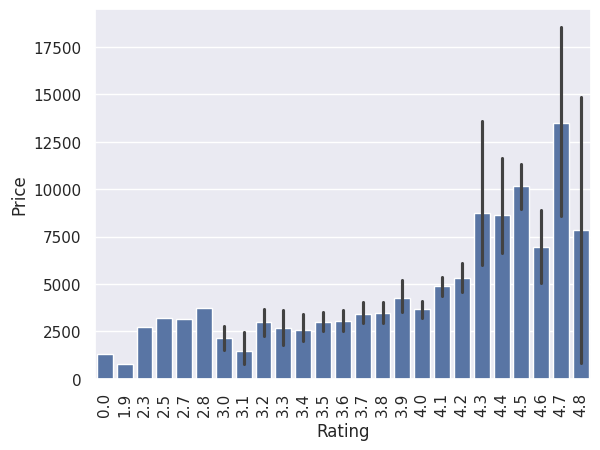

In [147]:
sns.barplot(x='Rating',y='Price',data=data)
plt.xticks(rotation=90)

<Axes: >

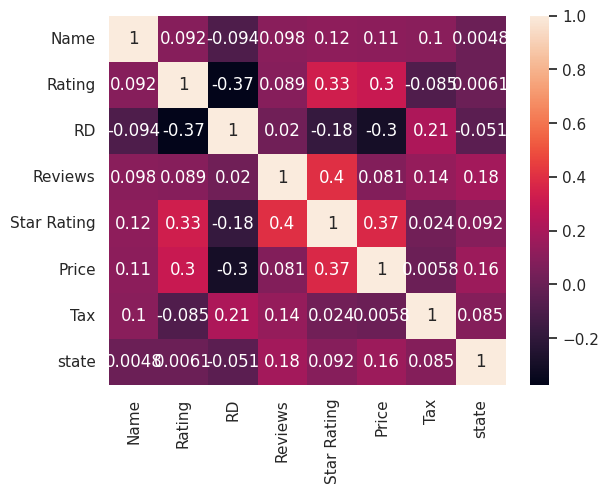

In [148]:
sns.heatmap(data.corr(),annot=True)

DATA SPLITTING

In [149]:
x=data.drop('Name',axis=1)
y=data['Name']
print(x)
print(y)

     Rating  RD  Reviews  Star Rating  Price     Tax  state
0       3.9   4   4187.0          5.0   7567  2254.0      1
1       4.0   4   2201.0          4.0   1509   531.0      1
2       4.4   1   1315.0          5.0   9900     0.0      1
3       4.0   4   5089.0          5.0   2347   918.0      1
4       4.0   4   3290.0          4.0   2522  1014.0      1
..      ...  ..      ...          ...    ...     ...    ...
575     3.6   4    214.0          0.0    678   189.0      5
576     3.9   4    963.0          4.0   4743  1122.0      5
577     3.8   4   1064.0          3.0   3726  1028.0      5
578     4.1   4   2183.0          4.0   7250     0.0      5
579     4.0   4   1866.0          4.0   4883  1155.0      5

[580 rows x 7 columns]
0      509
1      268
2      237
3      290
4      265
      ... 
575     34
576     50
577    194
578    182
579    387
Name: Name, Length: 580, dtype: int64


In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

ML ALGORITHMS : without scaling

Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test,y_test))

0.047466345330020365
0.0029897504968887656


Random Forest Regressor

In [152]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(x_train, y_train)
print(rfr.score(x_train, y_train))
print(rfr.score(x_test, y_test))

0.8575525117486031
0.10923338023914564


XGBoost Regressor

In [153]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
print(model_xgb.score(x_train, y_train))
print(model_xgb.score(x_test,y_test))

0.9987623831886507
-0.0888782105694017


KNN

In [154]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
model_knn.fit(x_train, y_train)
print(model_knn.score(x_train, y_train))
print(model_knn.score(x_test, y_test))

0.24633588018442076
0.008825222639208041


GausianNB

In [155]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
print(model_nb.score(x_train, y_train))
print(model_nb.score(x_test, y_test))

1.0
0.0


Decision Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=5)  # You can adjust the maximum depth of the tree
model_tree.fit(x_train, y_train)
print(model_tree.score(x_train, y_train))
print(model_tree.score(x_test, y_test))

0.31279062711920513
-0.06561904322610457


ESTIMATING PERFORMANCE

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ytrain_pred=model_xgb.predict(x_train)
ytest_pred=model_xgb.predict(x_test)

mse1=mean_squared_error(y_train,ytrain_pred)
rmse1=(np.sqrt(mean_squared_error(y_train,ytrain_pred)))
r21=r2_score(y_train,ytrain_pred)

mse=mean_squared_error(y_test,ytest_pred)
rmse=(np.sqrt(mean_squared_error(y_test,ytest_pred)))
r2=r2_score(y_test,ytest_pred)

print("Performance Linear regressor model: ")
print('MSE: ',mse1," ",mse)
print('RMSE: ',rmse1," ",rmse)
print('R2 score: ',r21," ",r2)

Performance Linear regressor model: 
MSE:  34.74785340296628   30275.22576427284
RMSE:  5.894730986479899   173.99777517046832
R2 score:  0.9987623831886507   -0.0888782105694017


In [158]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_xgb,x,y,cv=5)

array([-2.55472051e-01, -2.24789345e-05, -2.30955518e-01, -4.06222763e-01,
       -1.37029257e-01])

In [159]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

print(selection.feature_importances_)

[0.16167181 0.03100323 0.21950688 0.09116607 0.19570793 0.16729253
 0.13365156]


In [160]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

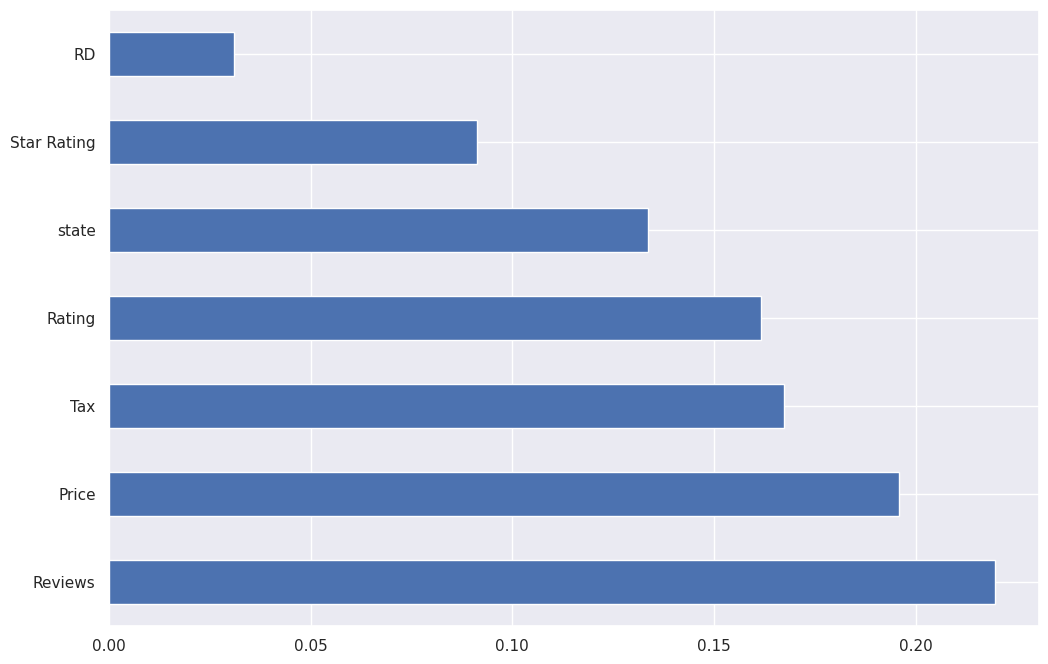

In [161]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [163]:
calc_vif(x)

,variables,VIF
0,Rating,12.958177
1,RD,6.263953
2,Reviews,2.298267
3,Star Rating,7.340155
4,Price,2.142501
5,Tax,1.963727
6,state,3.130828


SCALING OF DATA


Standard Scaler

       Rating        RD   Reviews  Star Rating     Price       Tax     state
0   -0.172482  0.658580  1.240461     0.980225  0.380819  2.607231 -0.835313
1    0.072114  0.658580  0.222329     0.384905 -0.575797 -0.080791 -0.835313
2    1.050498 -1.601635 -0.231882     0.980225  0.749222 -0.909195 -0.835313
3    0.072114  0.658580  1.702875     0.980225 -0.443468  0.522961 -0.835313
4    0.072114  0.658580  0.780610     0.384905 -0.415834  0.672729 -0.835313
..        ...       ...       ...          ...       ...       ...       ...
575 -0.906270  0.658580 -0.796315    -1.996374 -0.707019 -0.614339  1.496729
576 -0.172482  0.658580 -0.412337     0.384905 -0.065117  0.841218  1.496729
577 -0.417078  0.658580 -0.360559    -0.210415 -0.225711  0.694570  1.496729
578  0.316710  0.658580  0.213102     0.384905  0.330762 -0.909195  1.496729
579  0.072114  0.658580  0.050590     0.384905 -0.043010  0.892701  1.496729

[580 rows x 7 columns]
0      1.310985
1     -0.128411
2     -0.313561
3   

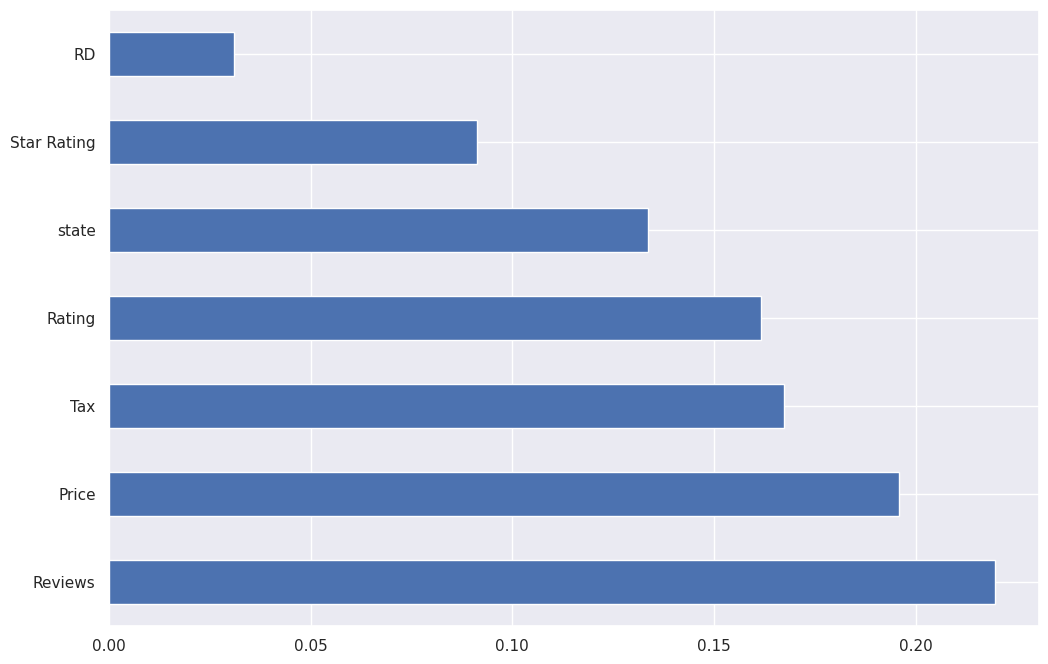

In [164]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
data_scaled = scaler.fit_transform(data)
data_standardized = pd.DataFrame(data_scaled, columns=data.columns)


x=data_standardized.drop('Name',axis=1)
y=data_standardized['Name']
print(x)
print(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
print(model_xgb.score(x_train, y_train))
print(model_xgb.score(x_test,y_test))

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()


ML Algortihms on scaled data standard scaler

In [165]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test,y_test))

0.04746634533002059
0.0029897504969035316


In [166]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(x_train, y_train)
print(rfr.score(x_train, y_train))
print(rfr.score(x_test, y_test))

0.8610822763813857
0.12842061785386616


In [167]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
print(model_xgb.score(x_train, y_train))
print(model_xgb.score(x_test,y_test))

0.9987616255037974
-0.08876456405578437


In [168]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
model_knn.fit(x_train, y_train)
print(model_knn.score(x_train, y_train))
print(model_knn.score(x_test, y_test))

0.2724195992791064
-0.11878973602591092


In [169]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=5)  # You can adjust the maximum depth of the tree
model_tree.fit(x_train, y_train)
print(model_tree.score(x_train, y_train))
print(model_tree.score(x_test, y_test))

0.31279062711920524
-0.03395538314688573


<Figure size 1000x2000 with 0 Axes>

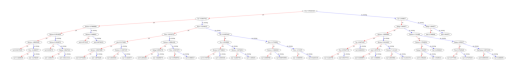

In [170]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
plot_tree(model_xgb,filled=True)
plt.show()

TESTING DATA

In [171]:
ra=int(input('Enter rating: '))
d = int(input('Enter rating description : '))
re=int(input('Enter number of reviews: '))
s= int(input('Enter star rating required: '))
p=int (input('Enter price range: '))
t=int (input('Enter tax expected: '))
b=float(input('banglore: '))
c=float(input('chennai: '))
d=float(input('delhi: '))
h=float(input('hyderabad: '))
k=float(input('kolkata: '))
m=float(input('mumbai: '))

Enter rating: 4
Enter rating description : 4
Enter number of reviews: 100
Enter star rating required: 5
Enter price range: 1500
Enter tax expected: 250
banglore: 0
chennai: 0
delhi: 0
hyderabad: 1
kolkata: 0
mumbai: 0


CONSIDERING XGBOOST REGRESSOR MACHINE LEARNING ALGORITHM BY MIN MAX SCALING FOR THE PREDICTION

In [172]:
ip=np.array([[b,c,d,h,k,m,ra,d,re,s,p,t]])
pred=model_xgb.predict(ip)[0]
h=df.loc[int(pred)]
print(pred)
print(h)

ValueError: Feature shape mismatch, expected: 7, got 12

In [ ]:
import pickle
with open('HRec.pkl','wb') as file:
  pickle.dump(model_xgb,file)

contentbased filtering


In [173]:
pip install fuzzywuzzy


In [174]:

from fuzzywuzzy import process
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the hotel dataset
hotels_df = pd.read_csv('hotel_data.csv', encoding='latin-1')
hotels_df.rename(columns={'ï»¿Hotel Name': 'Hotel Name'}, inplace=True)

# Convert Rating column to string
hotels_df['Rating'] = hotels_df['Rating'].astype(str)

# Combine relevant text data into a single feature for each hotel
hotels_df['combined_features'] = hotels_df['Rating'] + ' ' + hotels_df['Location'] + ' ' + hotels_df['state']


# Fit and transform the TF-IDF vectorizer on the combined text features
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with desired parameters
tfidf_vectorizer = TfidfVectorizer()

# Fill missing values in the 'combined_features' column with an empty string
hotels_df['combined_features'].fillna('', inplace=True)

# Fit and transform the TF-IDF vectorizer on the combined text features
tfidf_matrix = tfidf_vectorizer.fit_transform(hotels_df['combined_features'])



# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
def get_recommendations(hotel_title, hotels_df, cosine_sim):
    try:
        # Find exact match
        idx = hotels_df[hotels_df['Hotel Name'] == hotel_title].index[0]
    except IndexError:
        # If exact match not found, try fuzzy matching
        matches = process.extractOne(hotel_title, hotels_df['Hotel Name'])
        if matches[1] > 80:  # Adjust the similarity threshold as needed
            hotel_title = matches[0]
            idx = hotels_df[hotels_df['Hotel Name'] == hotel_title].index[0]
        else:
            return "Hotel not found in the dataset."

    # Get the pairwise similarity scores of all hotels with that hotel
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the hotels based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 most similar hotels
    sim_scores = sim_scores[1:6]

    # Get the hotel indices
    hotel_indices = [i[0] for i in sim_scores]

    # Return the top 5 similar hotels
    return hotels_df['Hotel Name'].iloc[hotel_indices]


hotel_title = 'Radisson Blu Atria Bengaluru'  # Enter the name of the hotel you want to get recommendations for
recommendations = get_recommendations(hotel_title, hotels_df, cosine_sim)
print("Recommended Hotels for", hotel_title, ":")
print(recommendations)


Recommended Hotels for Radisson Blu Atria Bengaluru :
75                                 Shangri-La Bengaluru
4     Keys Select by Lemon Tree Hotels, Hosur Road, ...
17                          Ashraya International Hotel
31           Ibis Bengaluru Hosur Road - An Accor Brand
51                            Zone By The Park Infantry
Name: Hotel Name, dtype: object


In [ ]:
print(hotels_df.columns)

In [175]:
import pickle

# Save the cosine similarity matrix
with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Save the hotels dataframe
with open('hotels_df.pkl', 'wb') as f:
    pickle.dump(hotels_df, f)


collaborative filtering

In [176]:

!pip install scikit-surprise

In [177]:
import pandas as pd

# Load your hotel dataset using pandas
hotels_df = pd.read_csv('hotel_data.csv', encoding='latin-1')
hotels_df.rename(columns={'ï»¿Hotel Name': 'Hotel Name'}, inplace=True)

# Generate sequential User IDs
hotels_df['User ID'] = range(1, len(hotels_df) + 1)

# Select relevant columns for collaborative filtering
ratings_df = hotels_df[['User ID', 'Hotel Name', 'Rating']]

print(ratings_df.head())  # Check the first few rows to verify


   User ID                                         Hotel Name  Rating
0        1                                 The Park Bangalore     3.9
1        2  Keys Select by Lemon Tree Hotels, Whitefield, ...     4.0
2        3            ITC Windsor - A Luxury Collection Hotel     4.4
3        4           Lemon Tree Premier Ulsoor Lake Bangalore     4.0
4        5  Keys Select by Lemon Tree Hotels, Hosur Road, ...     4.0


In [178]:
# Install surprise library if you haven't already
# pip install scikit-surprise

from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Define the rating scale for the surprise Reader
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are on a scale of 1 to 5

# Load dataset from pandas DataFrame to surprise Dataset format
data = Dataset.load_from_df(ratings_df[['User ID', 'Hotel Name', 'Rating']], reader)

# Use the SVD algorithm (Singular Value Decomposition)
algo = SVD()

# Perform cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the algorithm on the entire dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Example of recommending hotels for a user
def get_top_n_recommendations(user_id, n=5):
    # Get hotels that the user hasn't rated yet
    rated_hotels = ratings_df[ratings_df['User ID'] == user_id]['Hotel Name'].tolist()
    all_hotels = list(ratings_df['Hotel Name'].unique())
    unrated_hotels = [hotel for hotel in all_hotels if hotel not in rated_hotels]

    # Predict ratings for unrated hotels
    predictions = []
    for hotel in unrated_hotels:
        predicted_rating = algo.predict(user_id, hotel).est
        predictions.append((hotel, predicted_rating))

    # Sort predictions by predicted rating in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return top n recommendations
    top_n = predictions[:n]
    return top_n

# Example usage:
user_id = 1  # Replace with the actual user ID
top_recommendations = get_top_n_recommendations(user_id)
print(f"Top {len(top_recommendations)} Recommendations for User {user_id}:")
for idx, (hotel, predicted_rating) in enumerate(top_recommendations, 1):
    print(f"{idx}. {hotel} (Predicted Rating: {predicted_rating:.2f})")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0329  1.1343  nan     1.1263  1.0970  nan     nan     
MAE (testset)     0.9767  1.0466  nan     1.0483  1.0500  nan     nan     
Fit time          0.02    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Top 5 Recommendations for User 1:
1. Keys Select by Lemon Tree Hotels, Whitefield, Bengaluru (Predicted Rating: 5.00)
2. ITC Windsor - A Luxury Collection Hotel (Predicted Rating: 5.00)
3. Lemon Tree Premier Ulsoor Lake Bangalore (Predicted Rating: 5.00)
4. Keys Select by Lemon Tree Hotels, Hosur Road, Bengaluru (Predicted Rating: 5.00)
5. The Chancery Pavilion (Predicted Rating: 5.00)
